# Titanik Veri Seti


## Veri Seti ve Kütüphanelerin Yüklenmesi

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns


In [2]:
#df=sns.load_dataset("titanic")
#df.head()


train_df=pd.read_csv("C:/Users/ahmet/Downloads/AI/DATAI/titanic/train.csv")
test_df=pd.read_csv("C:/Users/ahmet/Downloads/AI/DATAI/titanic/test.csv")
test_PassengerId=test_df["PassengerId"]

In [3]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


## Feature İnceleme

* Survived

* Pclass

* Name

* Sex

* Age

* SibS

* Parch

* Ticket

* Fare

* Cabin

* Embarked


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train_df.Fare.dtype

dtype('float64')

### Kategorik Değişken Analizi

* Survived
* Sex
* Pclass
* Embarked
* Cabin
* Name
* Ticked
* Sibssp
* Parch

In [8]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
def bar_plot(variable):
    """
    input:  varieble ex: "Sex"
    outpu:  bar plot & value count
    """
    #get feature
    var = train_df[variable]
    #count number of categorical variable
    varValue= var.value_counts()

    #visualize
    plt.figure(figsize=(9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n{}".format(variable,varValue))

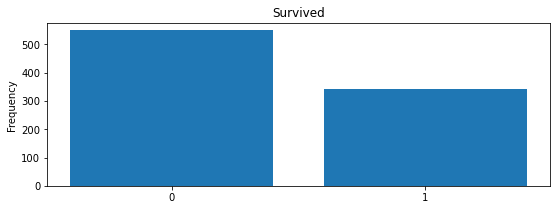

Survived: 
0    549
1    342
Name: Survived, dtype: int64


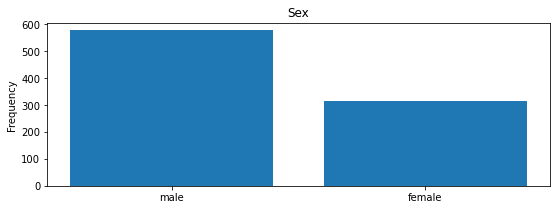

Sex: 
male      577
female    314
Name: Sex, dtype: int64


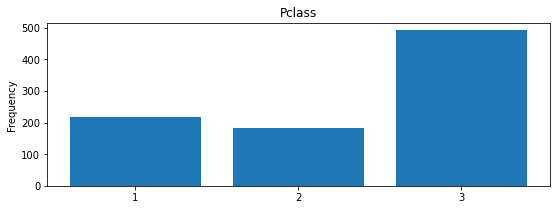

Pclass: 
3    491
1    216
2    184
Name: Pclass, dtype: int64


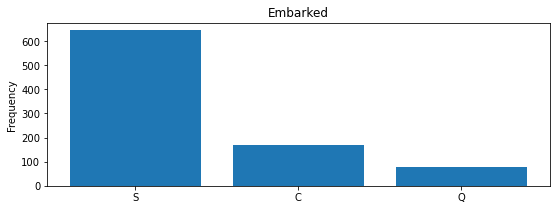

Embarked: 
S    644
C    168
Q     77
Name: Embarked, dtype: int64


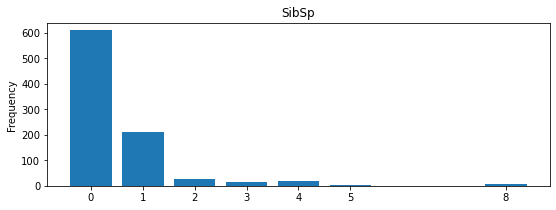

SibSp: 
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


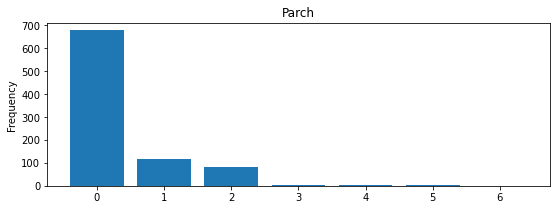

Parch: 
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


In [10]:
category1=["Survived",
            "Sex",
            "Pclass",
            "Embarked",
            "SibSp",
            "Parch"]
for c in category1:
    bar_plot(c)      

In [11]:
category2=["Cabin","Name","Ticket"]
for c in category2:
    print("{} \n".format(train_df[c].value_counts()))

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64 

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64 

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64 



### Numerik Değişken Analizi

* Fare
* Age
* PassengerId

In [12]:
def plot_hist(variable):
    plt.figure(figsize=(9,3))
    plt.hist(train_df[variable], bins=50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

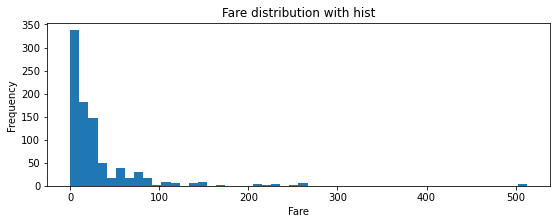

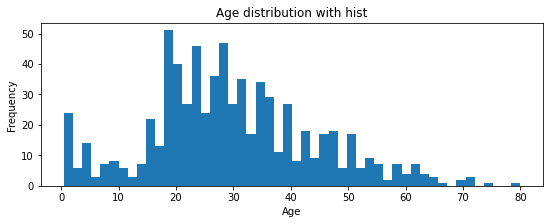

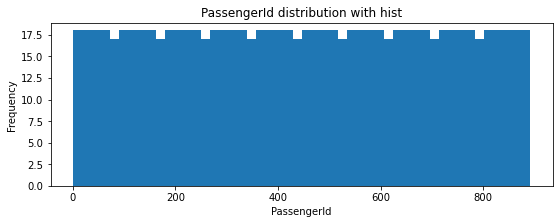

In [13]:
numericVar=["Fare","Age","PassengerId"]
for n in numericVar:
    plot_hist(n)

## İlişkisel Veri Analizi

* Pclass - Survived
* Sex - Survived
* Sibsp - Survived
* Parch - Survived

In [14]:
# Pclass - Survived
train_df[["Pclass","Survived"]]

,Pclass,Survived
0,3,0
1,1,1
2,3,1
3,1,1
4,3,0
...,...,...
886,2,0
887,1,1
888,3,0
889,1,1


In [15]:
#Pclass a göre grupla
#ve ortalamasını göster
train_df[["Pclass","Survived"]].groupby(["Pclass"], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [16]:
(train_df[["Pclass","Survived"]] #pclass ve sruvivede seçtik
    .groupby(["Pclass"], as_index=False) #Pclass'a göre grupladık
    .mean()
    .sort_values(by="Survived",
                    ascending=False)) #Azalan şekilde sırala

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [17]:
(train_df[["Sex","Survived"]] #pclass ve sruvivede seçtik
    .groupby(["Sex"], as_index=False) #Pclass'a göre grupladık
    .mean()
    .sort_values(by="Survived",
                    ascending=False)) #Azalan şekilde sırala

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [18]:
(train_df[["SibSp","Survived"]] #pclass ve sruvivede seçtik
    .groupby(["SibSp"], as_index=False) #Pclass'a göre grupladık
    .mean()
    .sort_values(by="Survived",
                    ascending=False)) #Azalan şekilde sırala

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [19]:
(train_df[["Parch","Survived"]] #pclass ve sruvivede seçtik
    .groupby(["Parch"], as_index=False) #Pclass'a göre grupladık
    .mean()
    .sort_values(by="Survived",
                    ascending=False)) #Azalan şekilde sırala

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


## Outlier 

In [20]:
def detect_outliers(df,features):
    outlier_indices=[]
    
    for c in features:
        #1st quartile
        Q1=np.percentile(df[c],25)
        
        #3st quartile
        Q3=np.percentile(df[c],75)
        
        #IQR
        IQR =Q3-Q1
        
        #Oulier step
        outlier_step =IQR*1.5
        
        #Detect outlier and their indeces
        outlier_list_col = df[(df[c]<Q1 - outlier_step) | (df[c] > Q3 +outlier_step)].index
       
        #Store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)   
    multiple_outliers= list(i for i, v in outlier_indices.items() if v >2)
    return multiple_outliers

In [21]:
train_df.loc[detect_outliers(train_df,["Age","SibSp","Parch","Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [22]:
#drop outliers
train_df= train_df.drop(detect_outliers(train_df,["Age","SibSp","Parch","Fare"]),axis =0).reset_index(drop=True)

## Missing Value 
* Find Missing Value
* Fill Missing Value

In [23]:
train_df_len = len(train_df)
train_df2 =pd.concat([train_df, test_df], axis=0).reset_index(drop=True)

In [24]:
train_df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Find Missing Value

In [25]:
train_df2.columns[train_df.isnull().any()]

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [26]:
train_df2.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             256
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1007
Embarked          2
dtype: int64

In [27]:
train_df2[train_df2["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
821,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


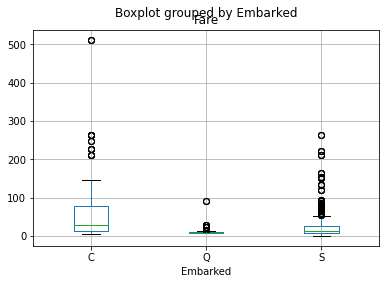

In [28]:
#Doldurma için uygun bir veriye dayalı yapabiliriz
#Ödeme miktarına göre binilen liman
train_df2.boxplot(column="Fare",by="Embarked")
plt.show()

In [29]:
train_df2["Embarked"]=train_df2["Embarked"].fillna("C")

In [30]:
train_df2[train_df2["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [31]:
train_df2[train_df2["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1033,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [32]:
train_df2[train_df2["Pclass"]==3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1293,1304,NaN,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
1294,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1296,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1297,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [33]:
#3. sınıf yolcular ortalama ne kadar ödeme yapmış
np.mean(train_df2[train_df2["Pclass"]==3]["Fare"])

12.741219971469327

In [34]:
train_df2["Fare"]=train_df2["Fare"].fillna(np.mean(train_df2[train_df2["Pclass"]==3]["Fare"]))

In [35]:
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


## Görselleştirme

### Korelasyon Matrisi

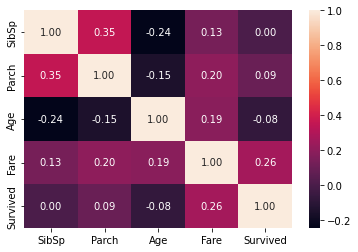

In [36]:
list1=["SibSp","Parch","Age","Fare","Survived"]
sns.heatmap(train_df2[list1].corr(),annot=True, fmt=".2f")
plt.show()

SipSp - Survived

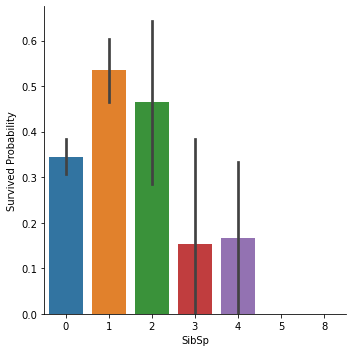

In [37]:
g= sns.factorplot(x="SibSp",
                  y="Survived",
                  data=train_df2,
                  kind="bar",
                  size=5)
g.set_ylabels("Survived Probability")
plt.show()                  

Parch - Survived

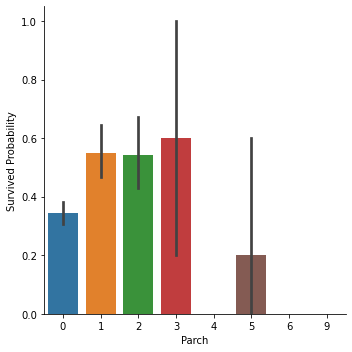

In [38]:
g= sns.factorplot(x="Parch",
                  y="Survived",
                  data=train_df2,
                  kind="bar",
                  size=5)
g.set_ylabels("Survived Probability")
plt.show()    

Pclass - Survived

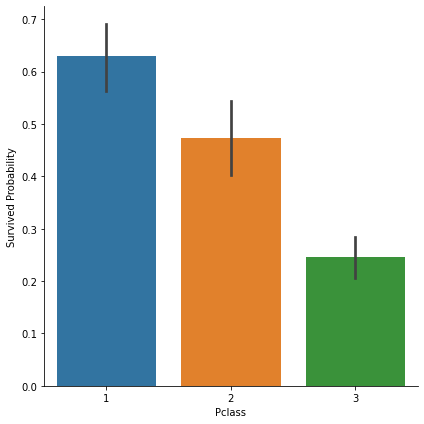

In [39]:
g= sns.factorplot(x="Pclass",
                  y="Survived",
                  data=train_df2,
                  kind="bar",
                  size=6)
g.set_ylabels("Survived Probability")
plt.show()    

Age - Survived

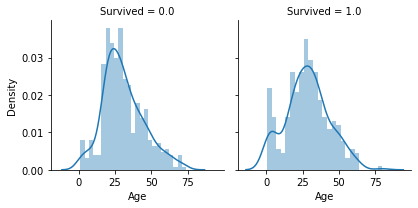

In [40]:
g= sns.FacetGrid(train_df2,
                  col="Survived")
g.map(sns.distplot, "Age", bins=25)                  
plt.show()    

İlk 5 yaş civarlarında olan çocukların öncelili olduğu sağ kalanlardan gözlenmekte.

Yolcular 15-35 yaş aralığında yer aldığı gözlenmekte.


Pclass - Survived - Age

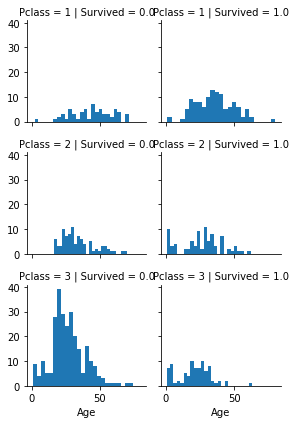

In [41]:
g= sns.FacetGrid(train_df2,
                  col="Survived",
                  row="Pclass",
                  size=2)
g.map(plt.hist, "Age", bins=25)   
g.add_legend()               
plt.show()    

Embarked - Sex - Pclass - Survived

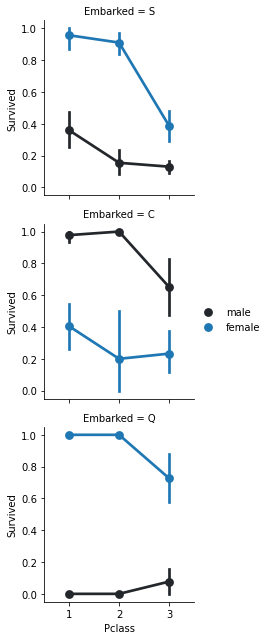

In [42]:
g= sns.FacetGrid(train_df2,
                 row="Embarked",
                 size=3)
g.map(sns.pointplot, "Pclass","Survived","Sex", bins=25)  
g.add_legend()                
plt.show()    

Embarked - Sex - Fare - Survived

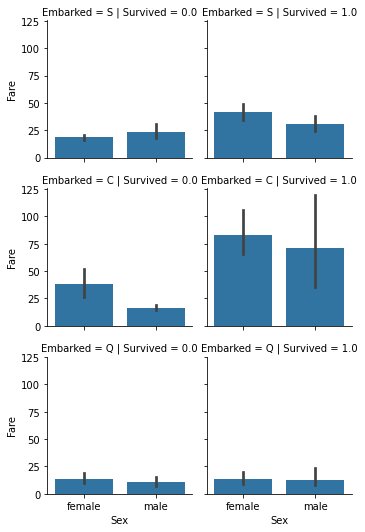

In [43]:
g= sns.FacetGrid(train_df2,
                 row="Embarked",
                 col="Survived",
                 size =2.5)
g.map(sns.barplot, "Sex","Fare")  
g.add_legend()                
plt.show()    

## Yaş Featuredaki Boşlukların Doldurulması

In [44]:
train_df2.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             256
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1007
Embarked          0
dtype: int64

In [45]:
#Nullları bul ve göster
train_df2[train_df2["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
27,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
1289,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
1291,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1294,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1297,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


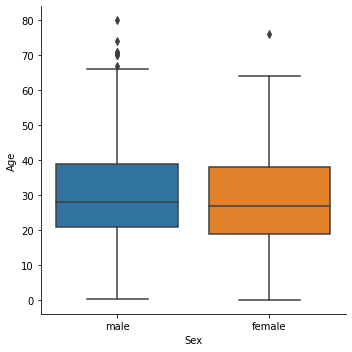

In [46]:
sns.factorplot(
    x= "Sex",
    y="Age",
    data=train_df2,
    kind="box"
)
plt.show()

Cinsiyet bilgisi yaş tahmini için veri sağlamadı.

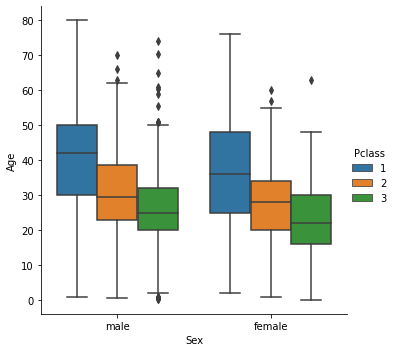

In [47]:
sns.factorplot(
    x= "Sex",
    y="Age",
    hue="Pclass",
    data=train_df2,
    kind="box"
)
plt.show()

Sınıf farkı yaş konusunda bir veri sağlıyor, kullanılabilir

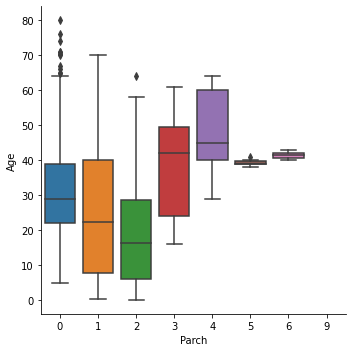

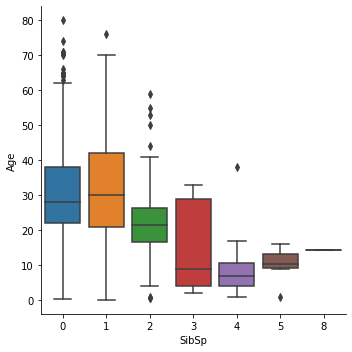

In [48]:
sns.factorplot(
    x= "Parch",
    y="Age",
    data=train_df2,
    kind="box"
)
sns.factorplot(
    x= "SibSp",
    y="Age",
    data=train_df2,
    kind="box"
)
plt.show()

<AxesSubplot:>

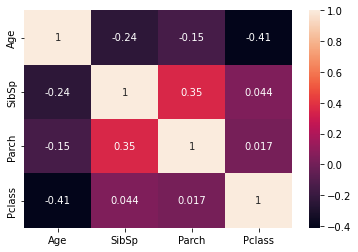

In [49]:
#Korelasyon var mı
sns.heatmap(train_df2[["Age",
                        "Sex", #Haritada görünmüyor sebebi str
                        "SibSp",
                        "Parch",
                        "Pclass"]]
                        .corr()
                        ,annot=True)

In [50]:
train_df2["Sex"]=[1 if i =="male" else 0 for i in train_df2["Sex"]]

<AxesSubplot:>

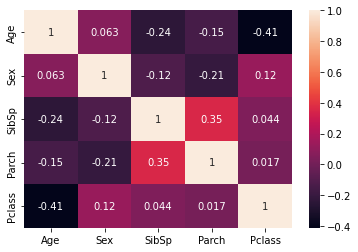

In [51]:
#Korelasyon var mı
sns.heatmap(train_df2[["Age",
                        "Sex", #Haritada artık görünüyor
                        "SibSp",
                        "Parch",
                        "Pclass"]]
                        .corr()
                        ,annot=True)

SibSp, Parch, Pclass ile Age üzerine veri türetebiliriz

In [52]:
index_nan_age = list(train_df2["Age"]
                [train_df2["Age"].isnull()]
                .index)
for i in index_nan_age:
    age_pred = train_df2["Age"][
                                ((train_df2["SibSp"]==train_df2.iloc[i]["SibSp"] ) &
                                (train_df2["Parch"]==train_df2.iloc[i]["Parch"] ) & 
                                (train_df2["Pclass"]==train_df2.iloc[i]["Pclass"] )) ] .median()      

    age_med =train_df2["Age"].median()
    if not np.isnan(age_pred):
        train_df2["Age"].iloc[i]=age_pred
    else:
        train_df2["Age"].iloc[i]=age_med                                             

In [53]:
age_pred

16.0

In [54]:
train_df2[train_df2["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
